#Центральная предельная теорема своими руками

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий: код, генерирующий выборки и графики; краткие описания каждого блока кода, объясняющие, что он делает; необходимые графики (убедитесь, что на них подписаны оси); выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n; выводы по результатам выполнения задания.

# Геометрическое распределение 
Под Геометрическим распределением в теории вероятностей подразумевают распределение вероятностей случайной величины $X$ равной номеру первого «успеха» в серии испытаний Бернулли и принимающей значения $n=1,2,3,...$

https://ru.wikipedia.org/w/index.php?search=Геометрическое%20распределение&title=Служебная%3AПоиск&ns0=1

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import geom
%matplotlib inline

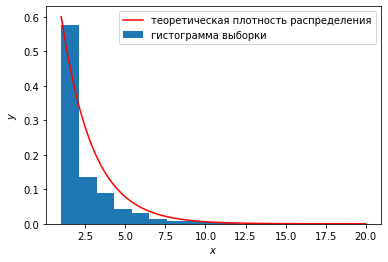

In [ ]:
# Параметр распределния
p = 0.4
# Генерация выборки
sample = geom.rvs(p, size = 1000)

plt.xlabel('$x$')
plt.ylabel('$y$')

# Гистограмма выборки
plt.hist(sample, density=True, stacked=True, label='гистограмма выборки')

# Теоретическая плотность распределения
x = np.linspace(1, 20, 100)
plt.plot(x, (1  - p) ** x, 'r-', label='теоретическая плотность распределения')

plt.legend(loc='best')

In [ ]:
# математическое ожидание
EX = 1 / p
print('Математическое ожидание =', EX)

# дисперсия
DX = (1 - p) / p ** 2
print('Дисперсия =', DX)

Математическое ожидание = 2.5
Дисперсия = 3.749999999999999


In [ ]:
# Функция постройки гистограммы и плотности нормального распределения
def build(size_of_sample, Ex, Dx):
  # создание выборки
  samples = np.array([geom.rvs(p, size = size_of_sample) for x in range(1000)])
  mean = samples.mean(axis = 1)

  # построение гистограммы
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.hist(mean, density=True, label = 'гистограмма распр. выборочных средних')

  # параметры нормального распределения
  mu = Ex
  sigma = math.sqrt(Dx / size_of_sample)
  print('Математическое ожидание =', mu)
  print('Среднеквадратичное отклонение =', sigma)

  norm = sts.norm(loc = mu, scale = sigma)
  x = np.linspace(0.5, 4.5, 100)
  plt.plot(x, norm.pdf(x), label = 'плотность норм. распределения')

  plt.legend(loc='best')

Математическое ожидание = 2.5
Среднеквадратичное отклонение = 0.8660254037844385


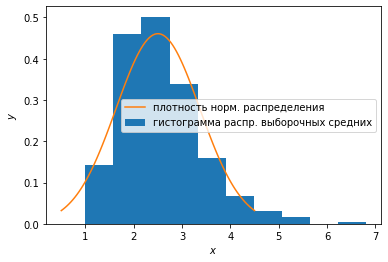

In [ ]:
build(5, EX, DX)

Математическое ожидание = 2.5
Среднеквадратичное отклонение = 0.6123724356957945


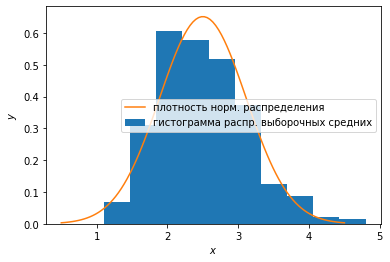

In [ ]:
build(10, EX, DX)

Математическое ожидание = 2.5
Среднеквадратичное отклонение = 0.27386127875258304


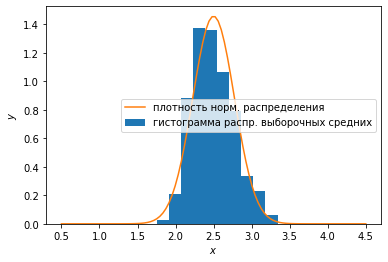

In [ ]:
build(50, EX, DX)

Гистограммы геометрического распределения выборочных средних хорошо описываются нормальным распределением с параметрами ($mu$, $sigma$).

С ростом числа n аппроксимация увеличивается